# Ensembles
Ensemble methods used here are: Random Forest, Bagging & Boosting ( AdaBoosting & Gradient Boosting)
Decision tree used to compare with the ensemble methods

Dataset used is Credit history data from archives of ics.uci.edu (german credit data)

In [211]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn import tree
from os import system
from IPython.display import Image 

In [212]:
#reading the data 
crData = pd.read_csv('credit.csv')

In [213]:
#understanding the data

In [214]:
crData.shape

(1000, 17)

In [215]:
crData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [216]:
crData.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_duration     object
percent_of_income        int64
years_at_residence       int64
age                      int64
other_credit            object
housing                 object
existing_loans_count     int64
job                     object
dependents               int64
phone                   object
default                 object
dtype: object

In [217]:
crData.isnull().any().sum()

0

In [218]:
crData.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [219]:
crData.describe().round(2)

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,20.90,3271.26,2.97,2.84,35.55,1.41,1.16
std,12.06,2822.74,1.12,1.10,11.38,0.58,0.36
min,4.00,250.00,1.00,1.00,19.00,1.00,1.00
25%,12.00,1365.50,2.00,2.00,27.00,1.00,1.00
50%,18.00,2319.50,3.00,3.00,33.00,1.00,1.00
75%,24.00,3972.25,4.00,4.00,42.00,2.00,1.00
max,72.00,18424.00,4.00,4.00,75.00,4.00,2.00


In [220]:
# checking the value count for the categories of the object data types

# Loop through all columns in the dataframe
for i in crData.columns:
     # only check for object data types
    if crData[i].dtype=='object':
        #counting the values for each category
        print(i,':')
        print(crData[i].value_counts(),'\n');

checking_balance :
unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64 

credit_history :
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64 

purpose :
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64 

savings_balance :
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64 

employment_duration :
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64 

other_credit :
none     814
bank     139
store     47
Name: other_credit, dtype: int64 

housing :
own      713
rent     179
other    108
Name: housing, dtype: int64 

job :
skilled       630
unskilled  

In [221]:
#Since many of the columns are of object/string data type, we need to convert them to ordinal data type before building any model

# Loop through all columns in the dataframe
for features in crData.columns:
    # only check for object data types
    if crData[features].dtype == 'object':
        #converting object data type to categorical
        crData[features] = pd.Categorical(crData[features])

In [222]:
#Since the values in the category data type columns are string and need to treated
# For columns like check_balance or credit_history or employment_duration, I prefer to give ordered values based on importance of the column value
#For columns like purpose, I am using one hot encoding as ordered values have no meaning for these column values.

#for ordered values 
replaceStruct = {
                 'checking_balance' : {'unknown' :-1, '< 0 DM':1,'1 - 200 DM':2, '> 200 DM':3},
                 'credit_history' :{'critical':1, 'poor':2, 'good':3, 'very good':4, 'perfect':5},
                 'savings_balance' :{'unknown':-1, '< 100 DM':1, '100 - 500 DM': 2, '500 - 1000 DM': 3, '> 1000 DM':4},
                 'employment_duration' :{'unemployed':1,'< 1 year':2, '1 - 4 years':3, '4 - 7 years':4, '> 7 years':5},
                 'phone' : {'no': 0, 'yes':1},
                 'default' :{'no':0, 'yes':1}
                }

#for oneHotEncoding
OneHotEncod = ['purpose', 'other_credit', 'housing', 'job']

In [223]:
crData = crData.replace(replaceStruct)
crData = pd.get_dummies(crData, columns = OneHotEncod)

crData.head()

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled
0,1,6,1,1169,-1,5,4,4,67,2,...,0,1,0,0,1,0,0,1,0,0
1,2,48,3,5951,1,3,2,2,22,1,...,0,1,0,0,1,0,0,1,0,0
2,-1,12,1,2096,1,4,2,3,49,1,...,0,1,0,0,1,0,0,0,0,1
3,1,42,3,7882,1,4,2,4,45,1,...,0,1,0,1,0,0,0,1,0,0
4,1,24,2,4870,1,3,3,4,53,2,...,0,1,0,1,0,0,0,1,0,0


In [224]:
crData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   checking_balance              1000 non-null   int64
 1   months_loan_duration          1000 non-null   int64
 2   credit_history                1000 non-null   int64
 3   amount                        1000 non-null   int64
 4   savings_balance               1000 non-null   int64
 5   employment_duration           1000 non-null   int64
 6   percent_of_income             1000 non-null   int64
 7   years_at_residence            1000 non-null   int64
 8   age                           1000 non-null   int64
 9   existing_loans_count          1000 non-null   int64
 10  dependents                    1000 non-null   int64
 11  phone                         1000 non-null   int64
 12  default                       1000 non-null   int64
 13  purpose_business              1000

In [225]:
#splitting data into train & test

X = crData.drop('default', axis=1)
y = crData.pop('default')

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=1)

Building Model

In [226]:
#Decision Tree
# default 'gini' criteria to split
dTgini = DecisionTreeClassifier(criterion='gini',
                               max_depth = 6,
                               min_samples_split= 3,
                               min_samples_leaf= 1,
                               random_state=1 
                               )

# default 'entropy' criteria to split
dTentropy = DecisionTreeClassifier(criterion='entropy',
                               max_depth = 6,
                               min_samples_split= 3,
                               min_samples_leaf= 1,
                               random_state=2 
                               )

In [227]:
print('Decision Tree (Gini):')
dTgini.fit(Xtrain, ytrain)
print(dTgini.score(Xtrain, ytrain))
print(dTgini.score(Xtest,ytest))

Decision Tree (Gini):
0.8175
0.685


In [228]:
print('Decision Tree (Gini):')
dTentropy.fit(Xtrain, ytrain)
print(dTentropy.score(Xtrain, ytrain))
print(dTentropy.score(Xtest,ytest))

Decision Tree (Gini):
0.78625
0.66


It is clearly evident that the decision tree model is over fit. The difference in the results for the train data & test data is more than 10%.

In [229]:
#Visualizing the decision tree
train_char_label = ['No', 'Yes']
CreditTree = open('credit_tree.dot', 'w')
dot_data = tree.export_graphviz(dTgini, out_file = CreditTree, feature_names = list(Xtrain), class_names = list(train_char_label))
CreditTree.close()

In [230]:
#Works only if "dot" command works on you machine & graphviz is install on your computer

#retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
#if(retCode>0):
#    print("system command returning error: "+str(retCode))
#else:
#    display(Image("credit_tree.png"))

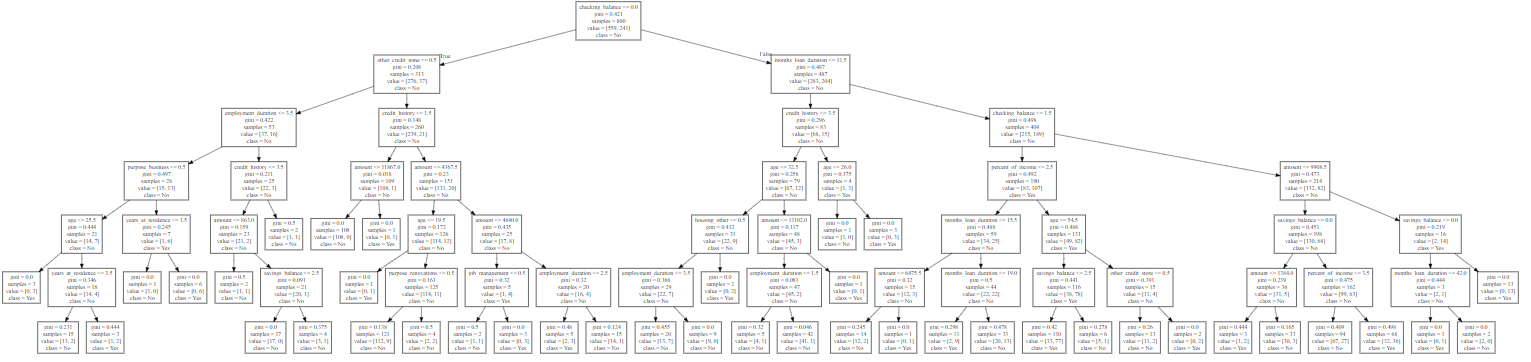

In [231]:
display(Image("credit_tree.png"))

In [381]:
#Lets now work on reducing the over fitting. To reduce the overfitting, I am decreasing the depth from 6 to 3.

dTgini1 =  DecisionTreeClassifier(criterion='gini', 
                                  max_depth=3,
                                  min_samples_split= 2,
                                  min_samples_leaf= 1,
                                  random_state=1)
print('Gini:')
dTgini1.fit(Xtrain, ytrain)
print(dTgini1.score(Xtrain,ytrain))
print(dTgini1.score(Xtest, ytest))

dTentropy1 =  DecisionTreeClassifier(criterion='entropy', 
                                  max_depth=3,
                                  min_samples_split= 2,
                                  min_samples_leaf= 1,
                                  random_state=1)
print('\nEntropy:')
dTentropy1.fit(Xtrain, ytrain)
print(dTentropy1.score(Xtrain,ytrain))
print(dTentropy1.score(Xtest, ytest))

Gini:
0.73125
0.705

Entropy:
0.71
0.705


In [382]:
train_char_label = ['No', 'Yes']
CreditTreeR = open('CreditTreeR.dot', 'w')
dot_data = tree.export_graphviz(dTgini1, out_file=CreditTreeR, feature_names = list(Xtrain), class_names = list(train_char_label))
CreditTreeR.close()

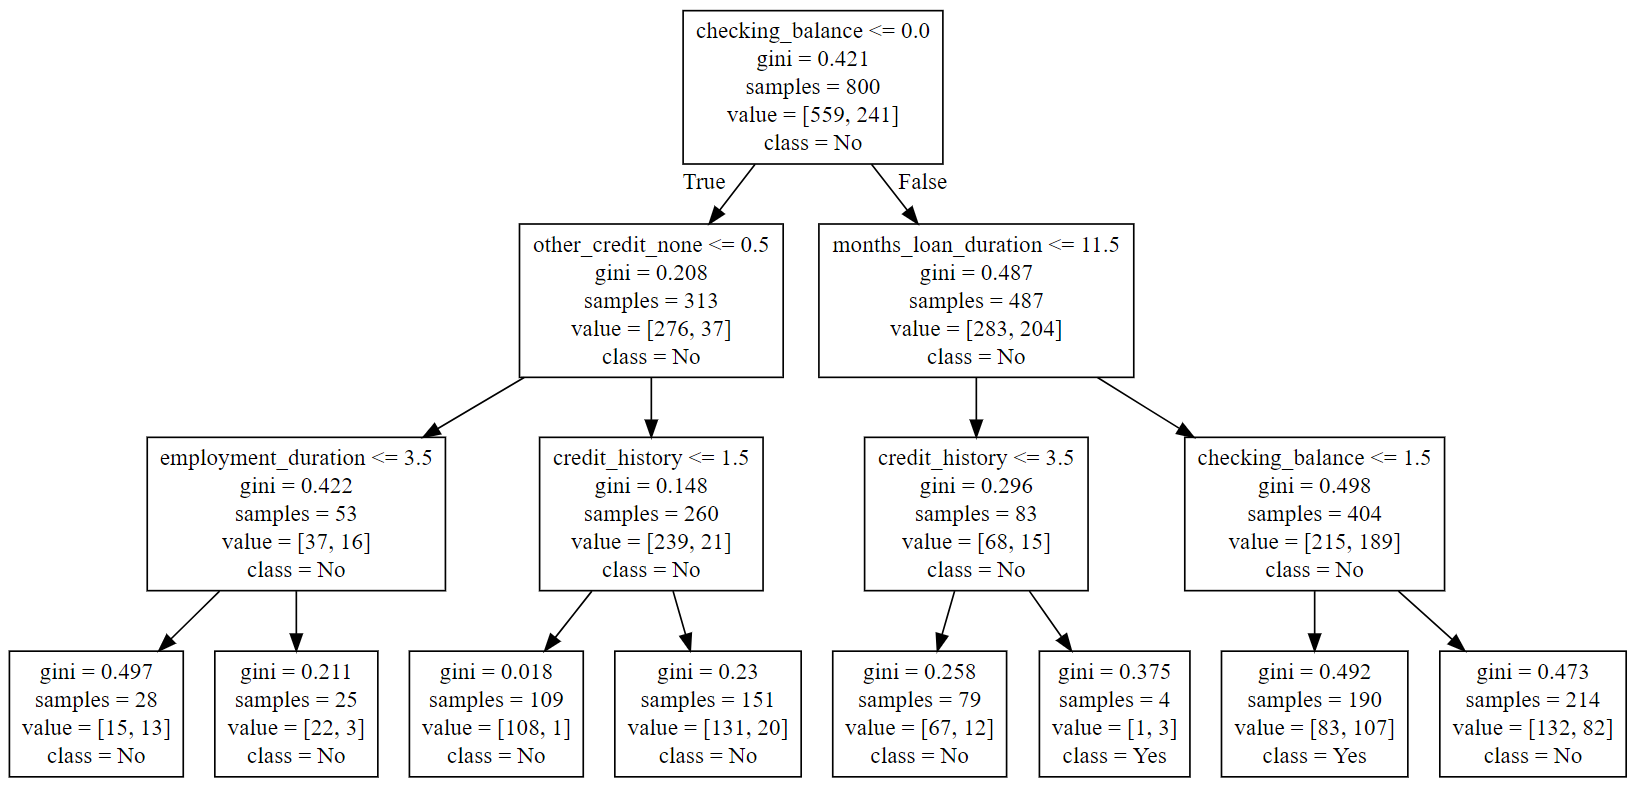

In [383]:
display(Image("credit_treeR.png"))

In [384]:
# importance of features in the tree building 

print(pd.DataFrame(dTgini1.feature_importances_, columns = ['Imp'], index = Xtrain.columns))

                                   Imp
checking_balance              0.636150
months_loan_duration          0.176232
credit_history                0.072164
amount                        0.000000
savings_balance               0.000000
employment_duration           0.048613
percent_of_income             0.000000
years_at_residence            0.000000
age                           0.000000
existing_loans_count          0.000000
dependents                    0.000000
phone                         0.000000
purpose_business              0.000000
purpose_car                   0.000000
purpose_car0                  0.000000
purpose_education             0.000000
purpose_furniture/appliances  0.000000
purpose_renovations           0.000000
other_credit_bank             0.000000
other_credit_none             0.066841
other_credit_store            0.000000
housing_other                 0.000000
housing_own                   0.000000
housing_rent                  0.000000
job_management           

There are many features which are not even used in decision tree.

Train Score: 0.73125
Test Score: 0.705


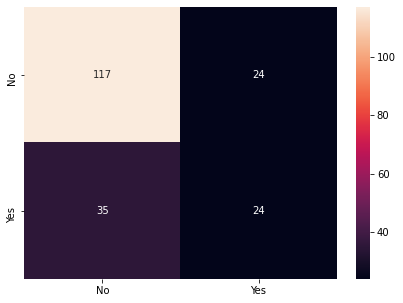

In [385]:
#Confusion Matrix
print('Train Score:', dTgini1.score(Xtrain,ytrain))
print('Test Score:', dTgini1.score(Xtest,ytest))

ypredict = dTgini1.predict(Xtest)

cm = confusion_matrix(ytest, ypredict, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ['No', 'Yes']],
                    columns = [i for i in ['No', 'Yes']]
                    )

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True, fmt = 'g')

In [386]:
print(classification_report(ytest, ypredict))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       141
           1       0.50      0.41      0.45        59

    accuracy                           0.70       200
   macro avg       0.63      0.62      0.62       200
weighted avg       0.69      0.70      0.70       200



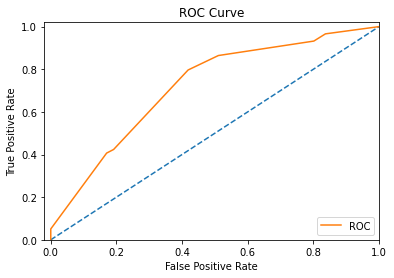

In [387]:
#ROC curve

dTprob = dTgini1.predict_proba(Xtest)[:,1]

fpr, tpr, threshold = roc_curve(ytest, dTprob)

plt.plot([0,1],[0,1], linestyle='--')

plt.plot(fpr, tpr, label='ROC')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [388]:
print('AUC:',roc_auc_score(ytest, prob))

AUC: 0.7742517129462675


Ensemble Techniques


In [389]:
# bagging

baggingClassifier = BaggingClassifier(base_estimator=dTgini1, n_estimators=50, random_state=1)
baggingClassifier = baggingClassifier.fit(Xtrain,ytrain)

In [390]:
ypredict = baggingClassifier.predict(Xtest)
print('Train Score:', baggingClassifier.score(Xtrain, ytrain))
print('Test Score:', baggingClassifier.score(Xtest, ytest))

Train Score: 0.775
Test Score: 0.755


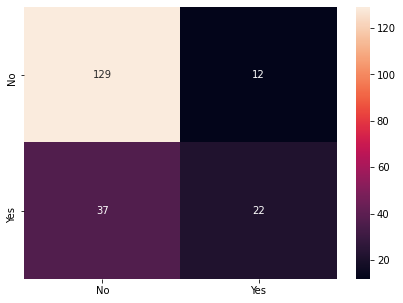

In [391]:
#Confusion Matrix
cm = confusion_matrix(ytest, ypredict, labels = [0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ['No', 'Yes']],
                    columns = [i for i in ['No', 'Yes']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot = True, fmt='g');

In [392]:
print('Classification Report:\n', classification_report(ytest, ypredict))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       141
           1       0.65      0.37      0.47        59

    accuracy                           0.76       200
   macro avg       0.71      0.64      0.66       200
weighted avg       0.74      0.76      0.73       200



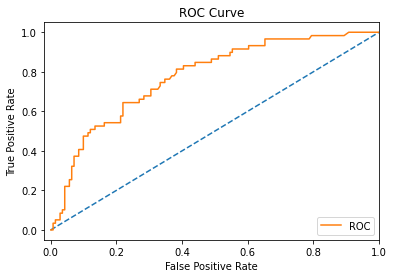

In [393]:
prob = baggingClassifier.predict_proba(Xtest)[:,1]

fpr, tpr, threshold = roc_curve(ytest, prob)

plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr, tpr, label='ROC')
_=plt.xlabel('False Positive Rate')
_=plt.ylabel('True Positive Rate')
_=plt.title('ROC Curve')
_=plt.xlim([-0.02,1])
_=plt.legend(loc='lower right')

In [394]:
print('AUC:',roc_auc_score(ytest, prob))

AUC: 0.7754537805024644


In [395]:
#adabossting
adaBoost = AdaBoostClassifier(
                             #base_estimator=dTgini1,
                             n_estimators=50,
                             random_state=2)
adaBoost = adaBoost.fit(Xtrain, ytrain)

ypredict= adaBoost.predict(Xtest)
print('Train Score:',adaBoost.score(Xtrain, ytrain))
print('Test Score:',adaBoost.score(Xtest, ytest))

Train Score: 0.78125
Test Score: 0.75


Confusion Matrix:


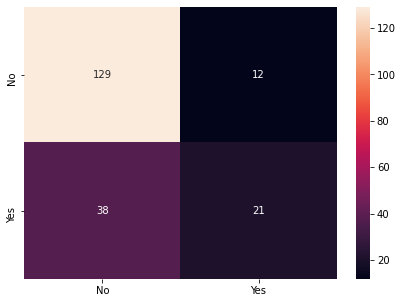

In [396]:
print('Confusion Matrix:')

cm = confusion_matrix(ytest, ypredict, labels = [0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ['No','Yes']],
                    columns = [i for i in ['No', 'Yes']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True, fmt='g');

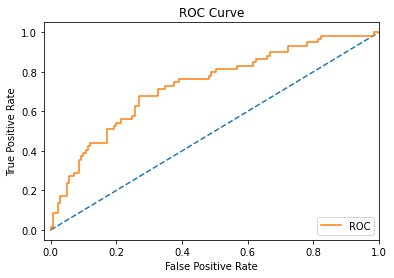

In [397]:
prob = adaBoost.predict_log_proba(Xtest)[:,1]

fpr, tpr, threshold = roc_curve(ytest, prob)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr, tpr, label='ROC')
_=plt.xlabel('False Positive Rate')
_=plt.ylabel('True Positive Rate')
_=plt.title('ROC Curve')
_=plt.xlim([-0.02,1])
_=plt.legend(loc='lower right')

In [398]:
print('AUC:', roc_auc_score(ytest, prob))

AUC: 0.7332612092799615


In [399]:
#GradientBoost
gradientBoostingC = GradientBoostingClassifier(learning_rate = 0.1,
                                               n_estimators = 25,
                                               random_state = 3)
gradientBoostingC = gradientBoostingC.fit(Xtrain, ytrain)

ypredict = gradientBoostingC.predict(Xtest)
print('Train Score:', gradientBoostingC.score(Xtrain, ytrain))
print('Test Score:', gradientBoostingC.score(Xtest, ytest))

Train Score: 0.80375
Test Score: 0.75


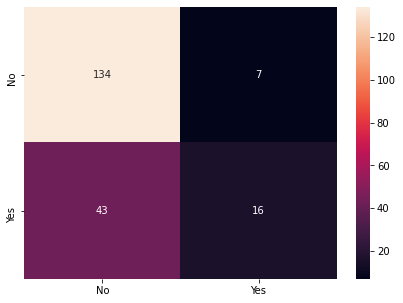

In [400]:
cm = confusion_matrix(ytest, ypredict, labels=[0,1])
df_cm = pd.DataFrame(cm, index = [i for i in ['No','Yes']],
                    columns = [i for i in ['No','Yes']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot = True, fmt = 'g');

In [401]:
print(classification_report(ytest, ypredict))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84       141
           1       0.70      0.27      0.39        59

    accuracy                           0.75       200
   macro avg       0.73      0.61      0.62       200
weighted avg       0.74      0.75      0.71       200



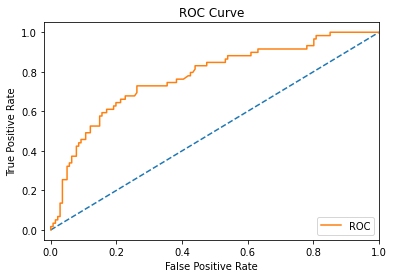

In [402]:
prob = gradientBoostingC.predict_proba(Xtest)[:,1]

fpr, tpr, threshold = roc_curve(ytest,prob)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr, tpr, label='ROC')
_=plt.xlabel('False Positive Rate')
_=plt.ylabel('True Positive Rate')
_=plt.title('ROC Curve')
_=plt.xlim([-0.02,1])
_=plt.legend(loc='lower right')

In [403]:
print('AUC:', roc_auc_score(ytest, prob))

AUC: 0.7742517129462675


In [488]:
#Ensemble Random Forest Classifier

RFC = RandomForestClassifier(n_estimators=50, 
                             random_state=4, 
                             max_features='log2',
                             max_depth=5)
RFC = RFC.fit(Xtrain, ytrain)

ypredict = RFC.predict(Xtest)

print('Train score:', RFC.score(Xtrain, ytrain))
print('Test Score:', RFC.score(Xtest, ytest))

Train score: 0.76625
Test Score: 0.71


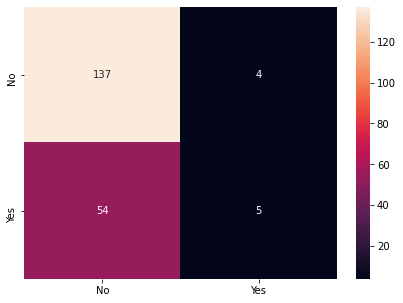

In [490]:
cm = confusion_matrix(ytest, ypredict, labels=[0,1])
df_cm = pd.DataFrame(cm, index=[i for i in ['No','Yes']],
                    columns = [i for i in ['No', 'Yes']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot = True, fmt = 'g');

In [491]:
print(classification_report(ytest, ypredict))

              precision    recall  f1-score   support

           0       0.72      0.97      0.83       141
           1       0.56      0.08      0.15        59

    accuracy                           0.71       200
   macro avg       0.64      0.53      0.49       200
weighted avg       0.67      0.71      0.63       200



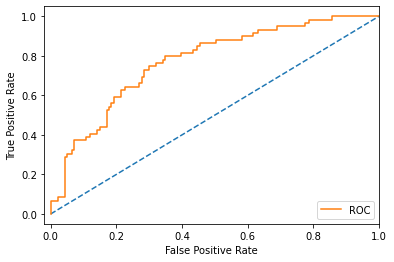

In [495]:
prob = RFC.predict_proba(Xtest)[:,1]

fpr, tpr, threshold = roc_curve(ytest, prob)

plt.plot([0,1],[0,1], linestyle ='--')

plt.plot(fpr, tpr, label='ROC')
_=plt.xlabel('False Positive Rate')
_=plt.ylabel('True Positive Rate')
_=plt.xlim([-0.02,1])
_=plt.legend(loc='lower right')

In [494]:
print('AUC:', roc_auc_score(ytest, prob))

AUC: 0.7713667508113956


In [496]:
#All the models need hypertining so that performance can be imporved.
# this is done to just describe - how to implement ensembles